In [59]:
mpg<-read.table("auto-mpg.txt",col.names = c("mpg","cylinders","displacement","horsepower","weight","acceleration","year","origin","name"),colClasses = c("numeric","integer","numeric","numeric","numeric","numeric","integer","factor","character"),na.strings = "?")
str(mpg)
summary(mpg)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ name        : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   1st Qu.: 75.0   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   Median : 93.5   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   Mean   :104.5   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   3rd Qu.:126.0   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                 NA's   :6                     
  acceleration        year       origin      name          
 Min.   : 8.00   Min.   :70.00   1:249   Length:398        
 1st Qu.:13.82   1st Qu.:73.00   2: 70   Class :character  
 Median :15.50   Median :76.00   3: 79   Mode  :character  
 Mean   :15.57   Mean   :76.01                             
 3rd Qu.:17.18   3rd Qu.:79.00                             


There are 6 obs with `horsepower` missing. Since this is a small number comparing to $N=398$, we decide to omit the missing data.

In [60]:
mpg<-na.omit(mpg)

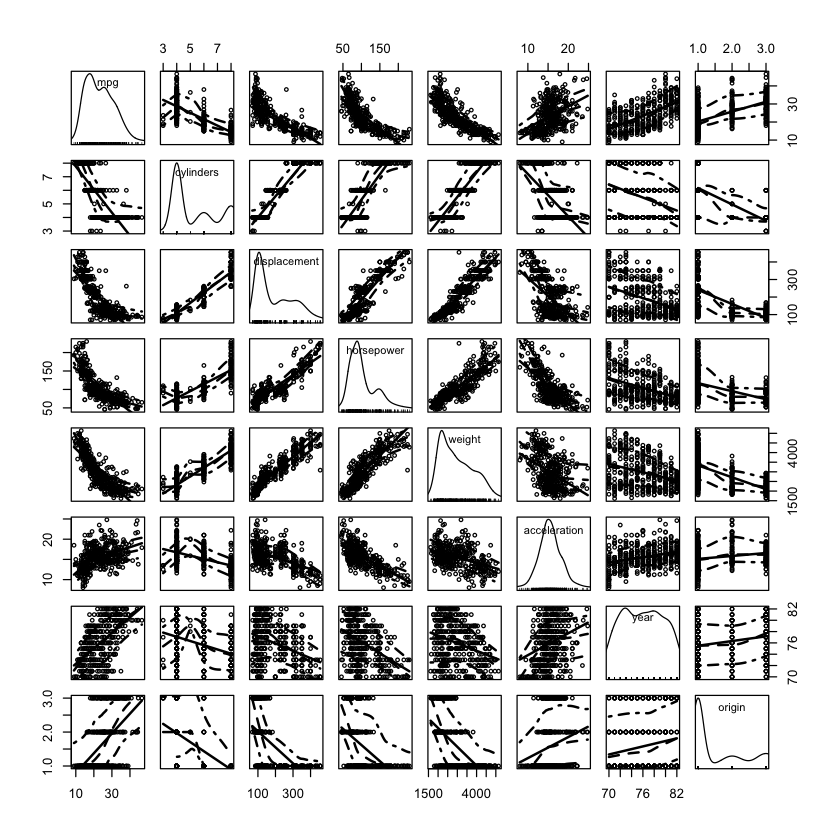

In [61]:
car::scatterplotMatrix(mpg[,-9],cex=0.6,col=1)

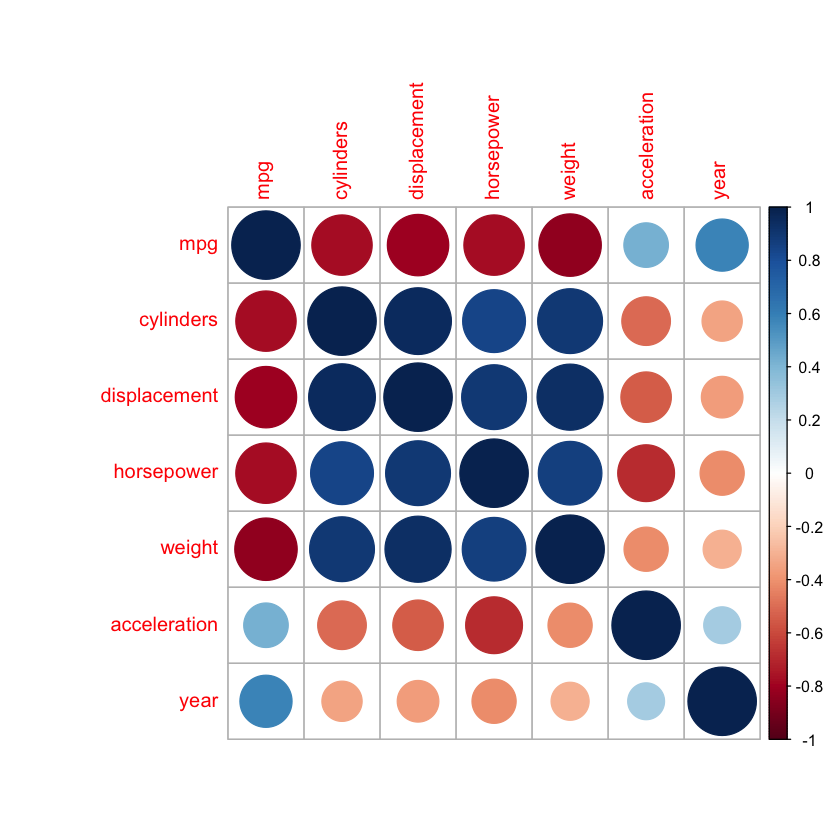

In [62]:
corrplot::corrplot(cor(mpg[,-c(8,9)]))

We see that some predictors are correlated with each other, especially `cylinders`, `displacement`, `horsepower`, and `weight`.

# Variable Transformation

We first choose the transformation of predictors.This is meant to transform the predictors into **Multinormality**.

In [63]:
summary(car::powerTransform(mpg[,3:6]))

bcPower Transformations to Multinormality 
             Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
displacement   -0.0509           0      -0.2082       0.1065
horsepower     -0.1249           0      -0.2693       0.0194
weight         -0.0870           0      -0.2948       0.1208
acceleration    0.3061           0      -0.0255       0.6376

Likelihood ratio test that transformation parameters are equal to 0
 (all log transformations)
                                 LRT df    pval
LR test, lambda = (0 0 0 0) 4.872911  4 0.30059

Likelihood ratio test that no transformations are needed
                                 LRT df       pval
LR test, lambda = (1 1 1 1) 390.0777  4 < 2.22e-16

Since all of the predictors range over less than one order of magnitude, it may not be very necessary to transform the predictors. However, from the scatter plot matrix, we see that there seems to be a nonlinear relationship between the response `mpg` and many of the predictors. We then use the Box-Cox transformation and try to find the $\lambda$ that minimizes the $RSS(\lambda)$ (Residual Sum of Squares). This is realized by the `MASS::boxcox()` function.

lambda,RSS
-0.37207,2339.654
-1.00000,2590.510
0.00000,2426.553
1.00000,3451.246


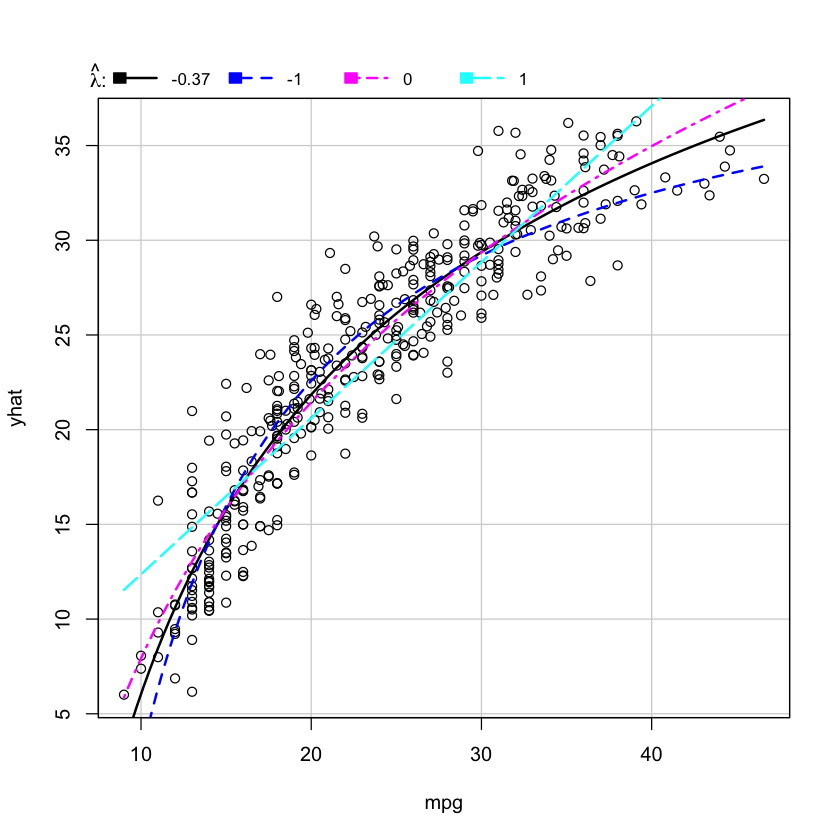

In [64]:
car::inverseResponsePlot(lm(mpg~.,data=mpg[,-9]))

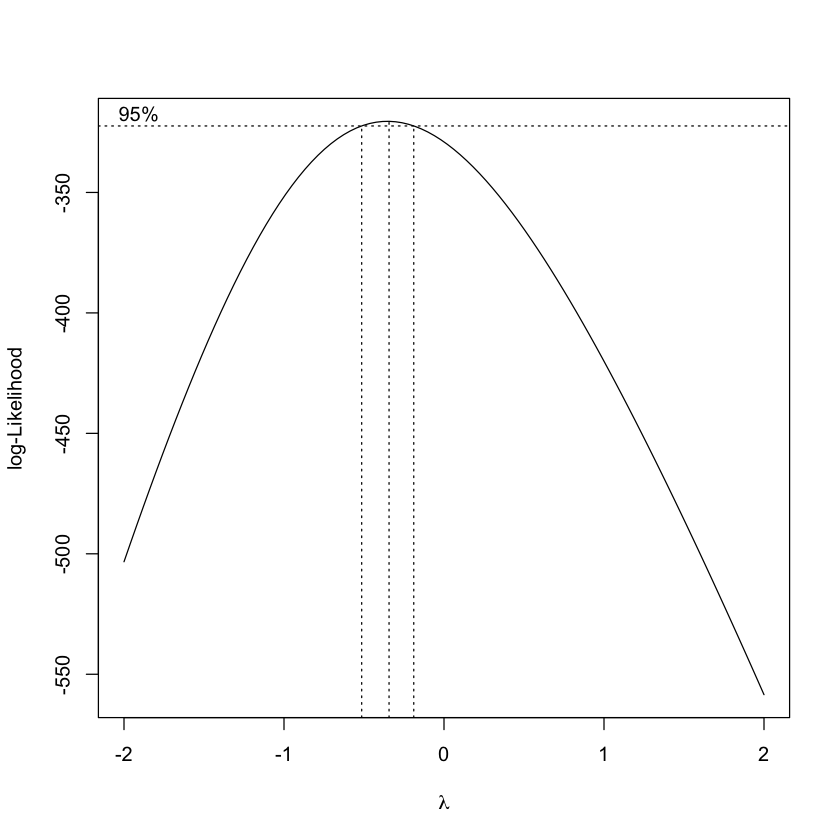

In [65]:
MASS::boxcox(lm(mpg~.,data=mpg[,-9]))

The estimated $\hat \lambda$ is -0.37. It is plausible to consider $\lambda=0$, $\lambda=-0.5$, or $\lambda=-1$. Nonetheless, it is preferred to use the transformation given by $\lambda=-1$, namely $1/Y$, because it gives a very natural interpretation. Other than the US who uses $\textbf {mpg}$, most areas use the unit $\textbf {L/100km}$ for fuel consumption, which is just proportional to the inverse of its value in mpg.

In [66]:
mpg$lp100km<-100/mpg$mpg*0.621371192*3.78541178
#car::inverseResponsePlot(lm(lp100km~., data=mpg[,-c(1,9)]))

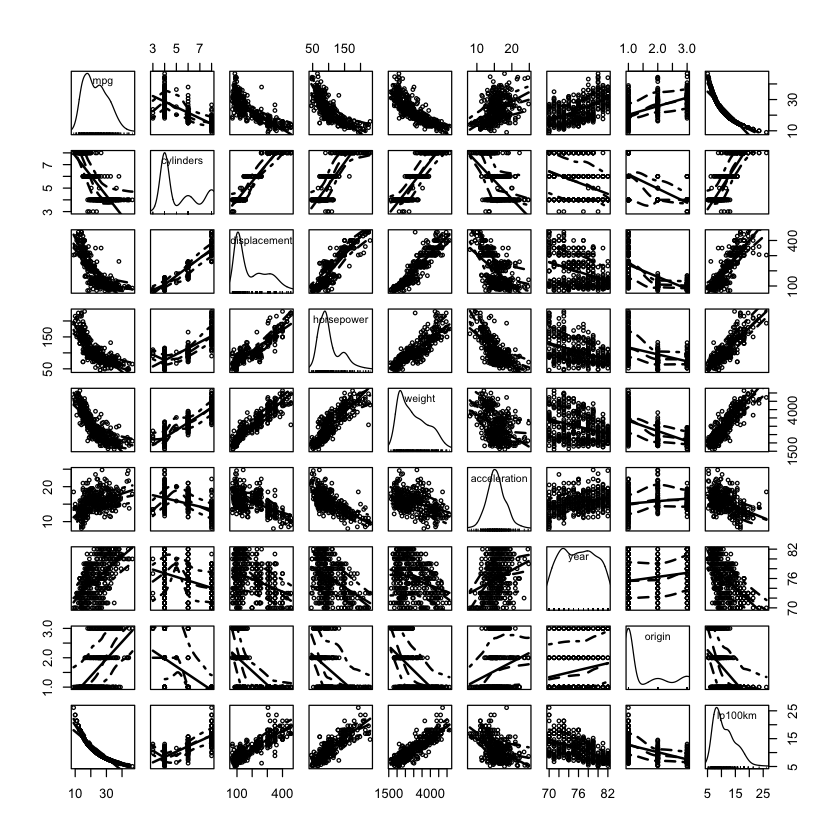

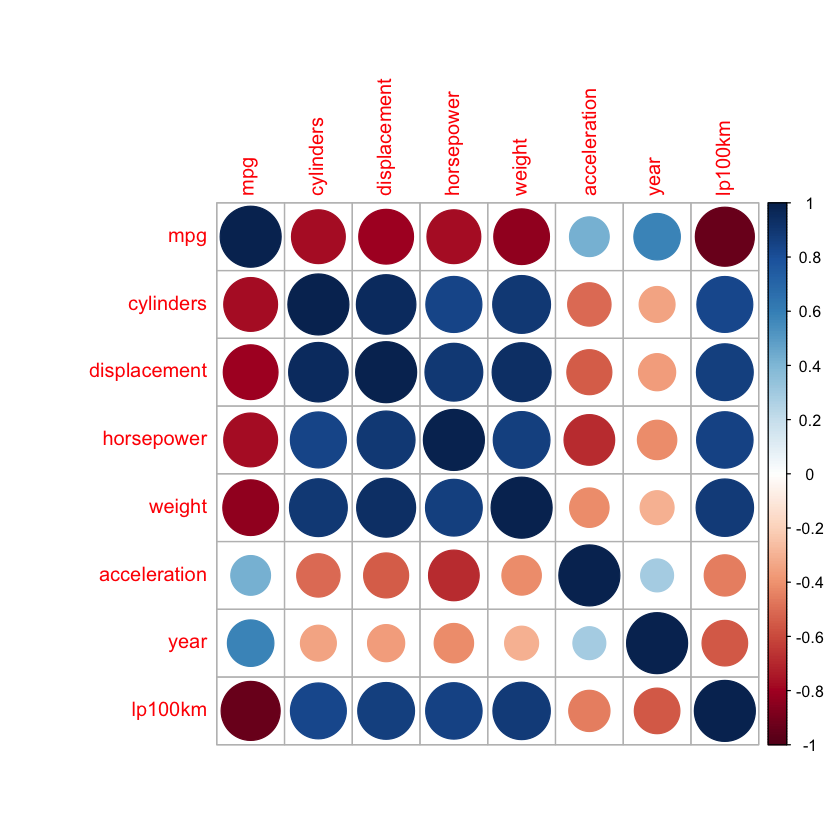

In [67]:
car::scatterplotMatrix(mpg[,-9],cex=0.6,col=1)
corrplot::corrplot(cor(mpg[,-c(8,9)]))

We hereafter choose `lp100km` as the response variable instead of `mpg`.

In [68]:
lm.full<-lm(lp100km ~.,data=mpg[,-c(1,9)])

# Variable Selection via Best Subset Regression

In [69]:
lm.subset<-leaps::regsubsets(lp100km~.,data=mpg[,-c(1,9)])
#lm.subset<-leaps::regsubsets(lp100km~.,data=mpg[,c(2:5,10)])
summary.subset<-summary(lm.subset)
summary.subset

Subset selection object
Call: regsubsets.formula(lp100km ~ ., data = mpg[, -c(1, 9)])
8 Variables  (and intercept)
             Forced in Forced out
cylinders        FALSE      FALSE
displacement     FALSE      FALSE
horsepower       FALSE      FALSE
weight           FALSE      FALSE
acceleration     FALSE      FALSE
year             FALSE      FALSE
origin2          FALSE      FALSE
origin3          FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         cylinders displacement horsepower weight acceleration year origin2
1  ( 1 ) " "       " "          " "        "*"    " "          " "  " "    
2  ( 1 ) " "       " "          " "        "*"    " "          "*"  " "    
3  ( 1 ) " "       " "          "*"        "*"    " "          "*"  " "    
4  ( 1 ) " "       " "          "*"        "*"    " "          "*"  "*"    
5  ( 1 ) " "       " "          "*"        "*"    "*"          "*"  "*"    
6  ( 1 ) "*"       " "          "*"        "*"    "*"       

In [70]:
display=cbind(as.data.frame(summary.subset$outmat),round(summary.subset$rsq,4),round(summary.subset$adjr2,4),
              round(summary.subset$cp,4), round(summary.subset$bic,4))
colnames(display)[9:12]=c("R^2","adj R^2","Cp","BIC")
display

,cylinders,displacement,horsepower,weight,acceleration,year,origin2,origin3,R^2,adj R^2,Cp,BIC
1 ( 1 ),,,,*,,,,,0.7833,0.7828,345.1945,-587.5637
2 ( 1 ),,,,*,,*,,,0.8729,0.8723,44.0156,-790.7595
3 ( 1 ),,,*,*,,*,,,0.8809,0.8800,18.9399,-810.2816
4 ( 1 ),,,*,*,,*,*,,0.8823,0.8811,16.1213,-809.0264
5 ( 1 ),,,*,*,*,*,*,,0.8835,0.8820,14.1196,-807.0152
6 ( 1 ),*,,*,*,*,*,*,,0.8844,0.8826,13.1881,-803.9706
7 ( 1 ),*,*,*,*,,*,*,*,0.8856,0.8835,11.2046,-802.0115
8 ( 1 ),*,*,*,*,*,*,*,*,0.8868,0.8845,9.0000,-800.3202


In [71]:
###############################################
##### Stepwise regression using AIC criterion #######

lm.dat = lm(lp100km~.,data=mpg[,-c(1,9)])

## Forward selection-based stepwise regression with AIC criterion
lm.forward.AIC = step(lm.dat,k=2,direction="forward",test="F")

## Backward elimination-based stepwise regression with AIC criterion
lm.backward.AIC = step(lm.dat,k=2,direction="backward",test="F")

## Forward stepwise (forward selection and backward elimination) regression with AIC criterion
lm.both.AIC = step(lm.dat,k=2,direction="both",test="F")

#######
##### Stepwise regression using BIC criterion #######

## Forward selection-based stepwise regression with BIC criterion
#lm.forward.BIC = step(lm.dat,k=log(n),direction="forward",test="F")

## Backward elimination-based stepwise regression with BIC criterion
lm.backward.BIC = step(lm.dat,k=log(nrow(mpg)),direction="backward",test="F")

## Forward stepwise (forward selection and backward elimination) regression with BIC criterion
lm.both.BIC = step(lm.dat,k=log(nrow(mpg)),direction="both",test="F")

Start:  AIC=232.72
lp100km ~ cylinders + displacement + horsepower + weight + acceleration + 
    year + origin

Start:  AIC=232.72
lp100km ~ cylinders + displacement + horsepower + weight + acceleration + 
    year + origin

               Df Sum of Sq     RSS    AIC  F value    Pr(>F)    
<none>                       677.91 232.72                       
- acceleration  1      7.44  685.35 235.00   4.2046  0.040994 *  
- displacement  1     10.77  688.68 236.90   6.0864  0.014059 *  
- cylinders     1     13.23  691.14 238.29   7.4730  0.006554 ** 
- origin        2     17.48  695.39 238.70   4.9387  0.007626 ** 
- horsepower    1     52.32  730.23 259.86  29.5614 9.669e-08 ***
- weight        1    178.23  856.14 322.22 100.6942 < 2.2e-16 ***
- year          1    385.08 1062.99 407.05 217.5571 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Start:  AIC=232.72
lp100km ~ cylinders + displacement + horsepower + weight + acceleration + 
    year + origin



Therefore, the chosen model is the one with three predictors: `horsepower`, `weight`, and `year`.


Call:
lm(formula = lp100km ~ horsepower + weight + year, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6445 -0.7781 -0.0415  0.6283  6.2605 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.4559036  1.6527787  14.192  < 2e-16 ***
horsepower   0.0190489  0.0037306   5.106 5.17e-07 ***
weight       0.0029275  0.0001616  18.113  < 2e-16 ***
year        -0.3015859  0.0205997 -14.640  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.356 on 388 degrees of freedom
Multiple R-squared:  0.8809,	Adjusted R-squared:   0.88 
F-statistic: 956.8 on 3 and 388 DF,  p-value: < 2.2e-16


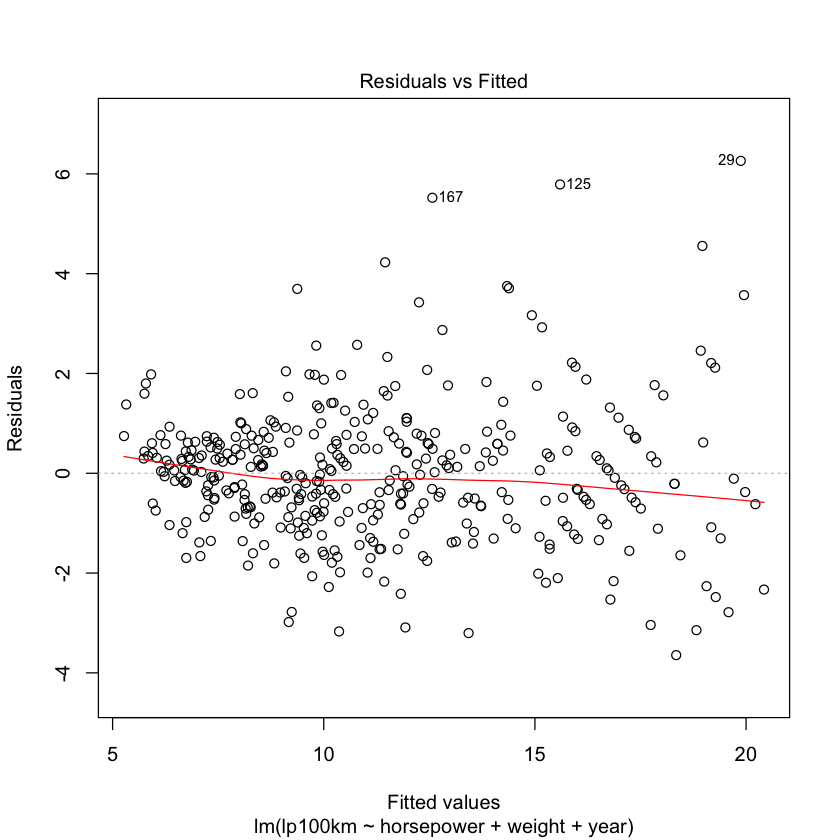

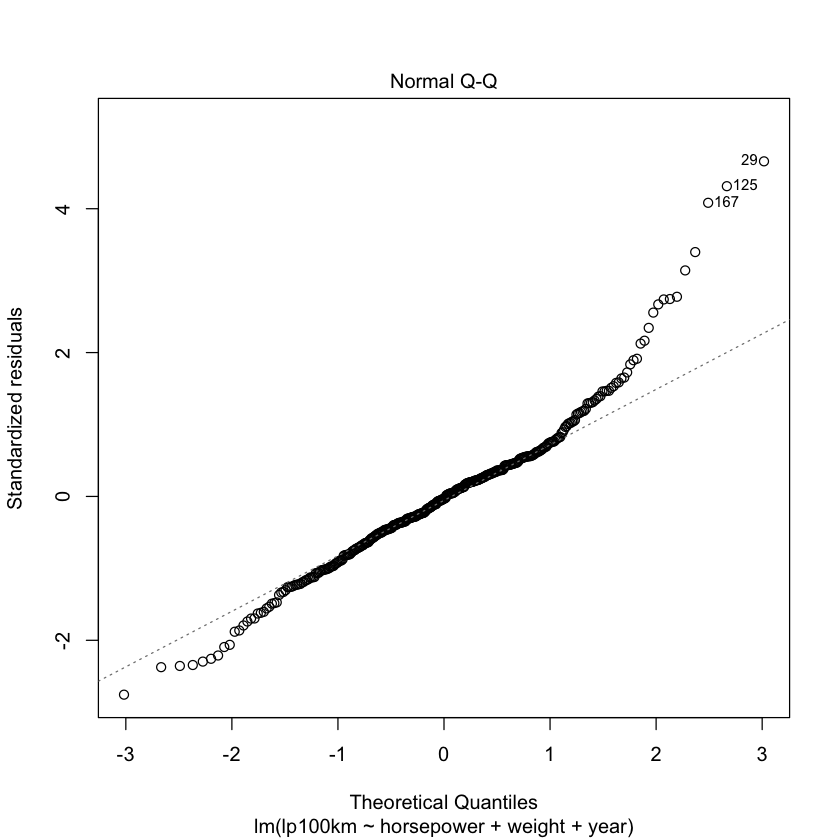

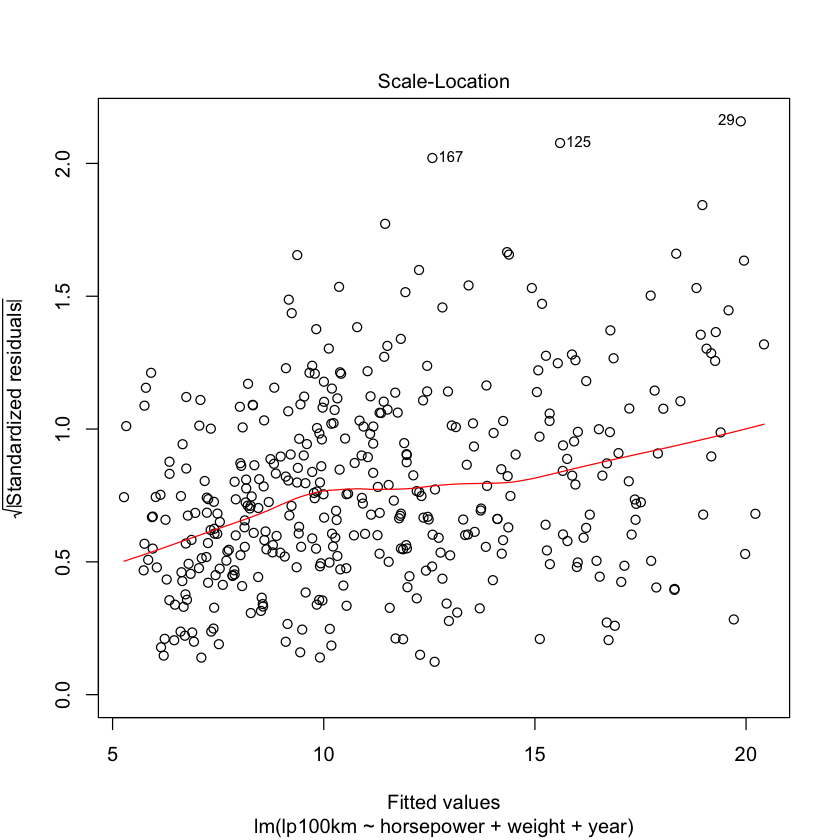

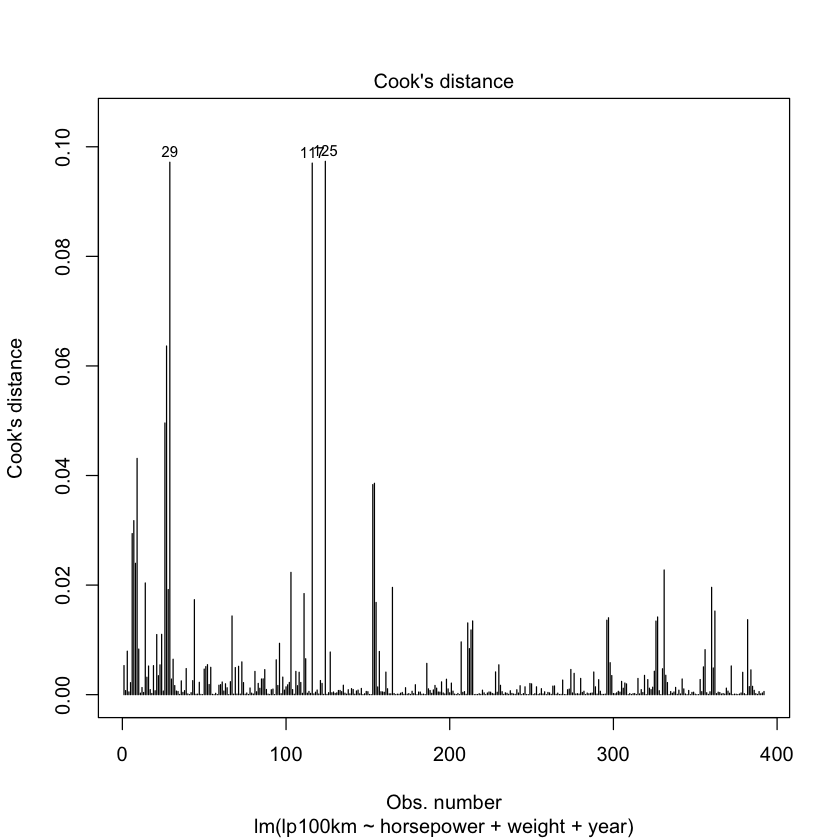

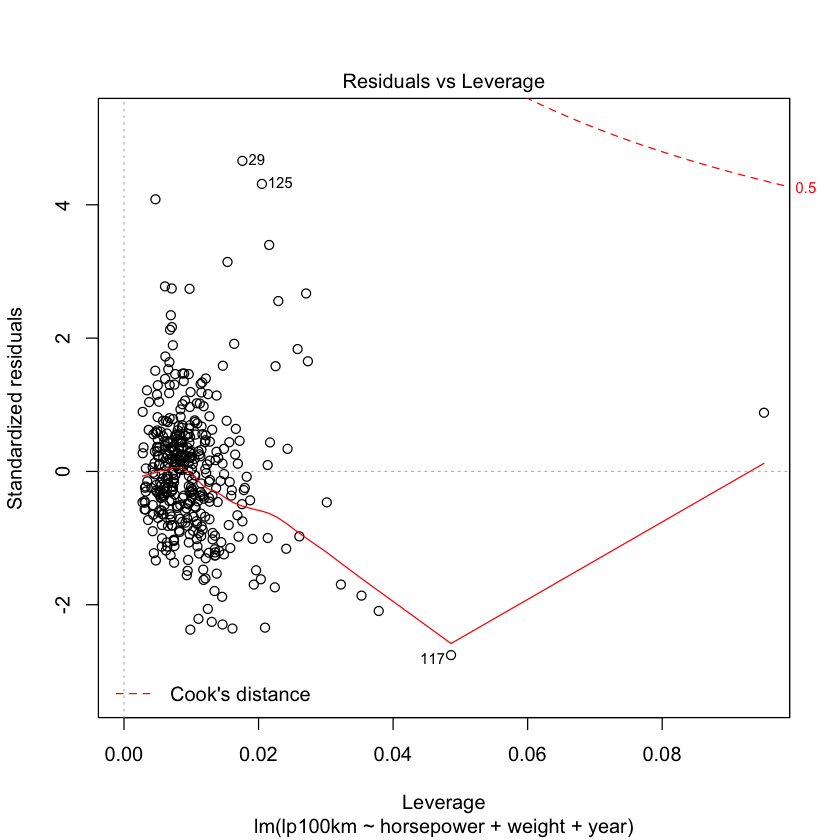

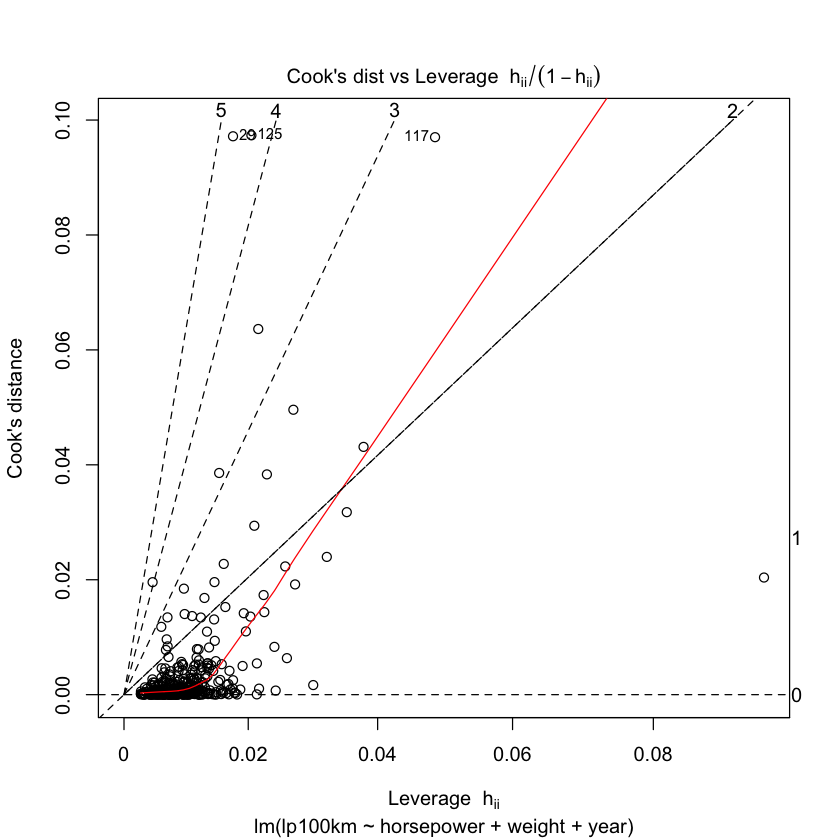

In [72]:
lm.chosen<-lm(lp100km~horsepower+weight+year,data=mpg)
summary(lm.chosen)
plot(lm.chosen,which = 1:6)

# Regression Diagnostic Based on the Chosen Model

## Outlier detection

In [73]:
which(rstandard(lm.chosen)>3)
which(rstudent(lm.chosen)>3)

27  29 125 156 167 
 27  29 124 154 165

27  29 125 156 167 
 27  29 124 154 165

3 is the 0.001 quantile of standard normal distribution and widely used to decide whether the point is an outlier. Both studentized residuals and standardized residuals imply that the 27th,29th,124th,154th,165th observations are outliers, so we delete them.

In [74]:
mpg=mpg[-c(27,29,124,154,165),]
lm.fit1=lm(lp100km~horsepower+weight+year,data=mpg)
summary(lm.fit1)


Call:
lm(formula = lp100km ~ horsepower + weight + year, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1994 -0.7604 -0.0070  0.6138  3.9680 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.0072782  1.4833283  15.511  < 2e-16 ***
horsepower   0.0156540  0.0034126   4.587  6.1e-06 ***
weight       0.0029839  0.0001464  20.377  < 2e-16 ***
year        -0.2941432  0.0185007 -15.899  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.215 on 383 degrees of freedom
Multiple R-squared:  0.8961,	Adjusted R-squared:  0.8953 
F-statistic:  1101 on 3 and 383 DF,  p-value: < 2.2e-16


In [75]:
MSE=mean(lm.fit1$residual^2)
MSE

[1] 1.460819

We can see that the adjusted R-squared has an improvement.

## Influence analysis

In [76]:
#cut-off when the cook distance larger than the median of F(p,n-p)
which(cooks.distance(lm.fit1)>qf(0.5,df1=4,df2=nrow(mpg)-4))

named integer(0)

So, there is no point that has a cook's distance larger than the suggested cut-off value.

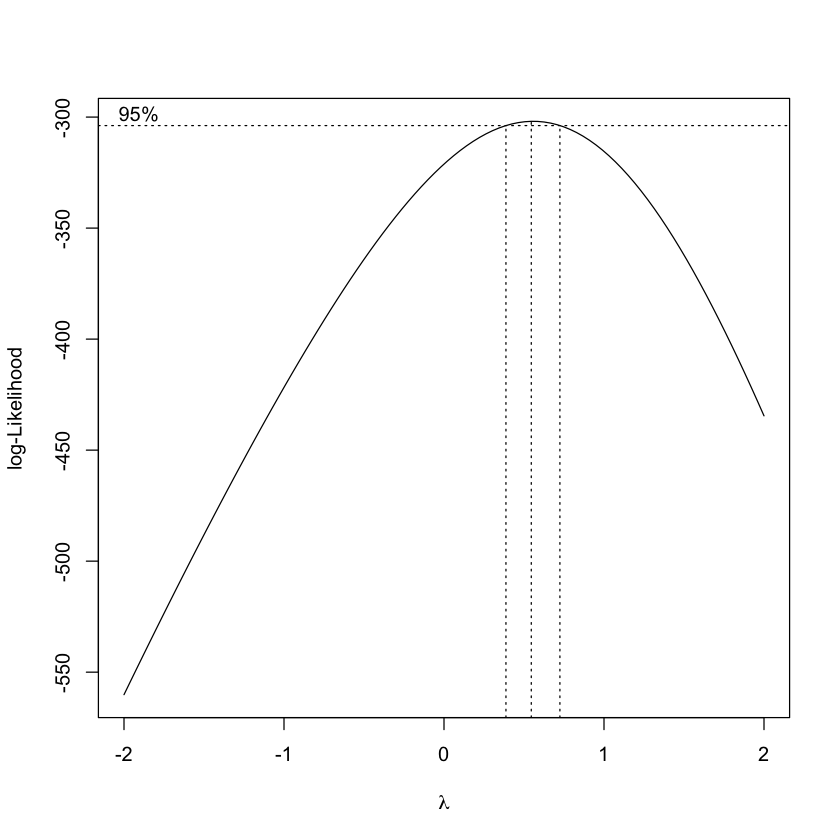

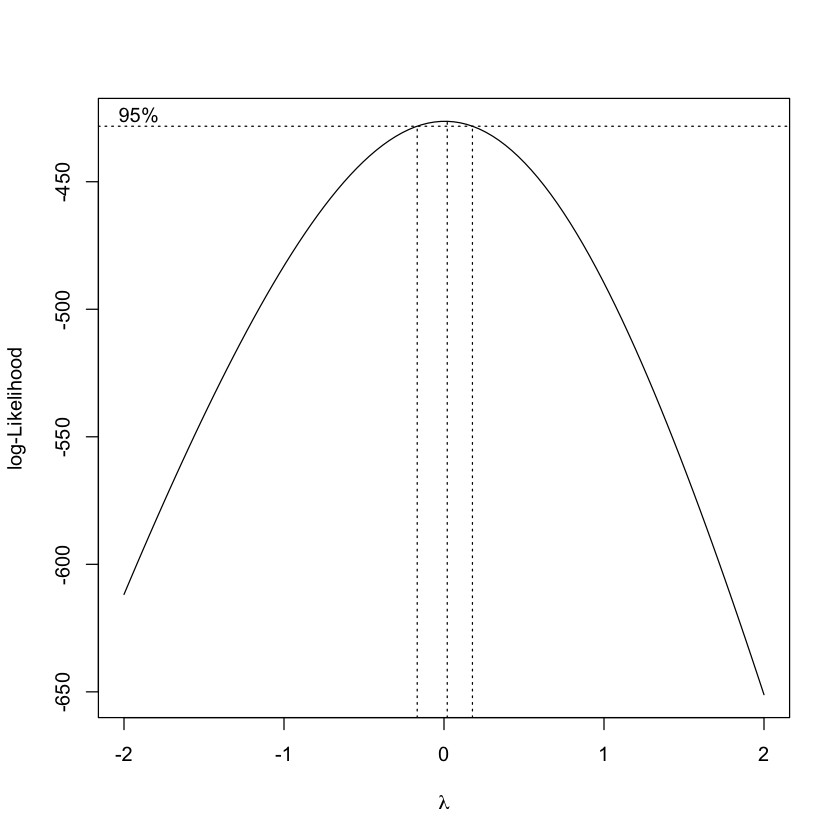


Call:
lm(formula = lp100km^1/2 ~ log(horsepower) + weight + year, data = mpg)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60427 -0.38080  0.00818  0.32371  2.16167 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.359e+00  1.144e+00   7.306 1.61e-12 ***
log(horsepower)  8.999e-01  1.966e-01   4.577 6.38e-06 ***
weight           1.476e-03  7.628e-05  19.352  < 2e-16 ***
year            -1.487e-01  9.153e-03 -16.242  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6075 on 383 degrees of freedom
Multiple R-squared:  0.8961,	Adjusted R-squared:  0.8953 
F-statistic:  1101 on 3 and 383 DF,  p-value: < 2.2e-16


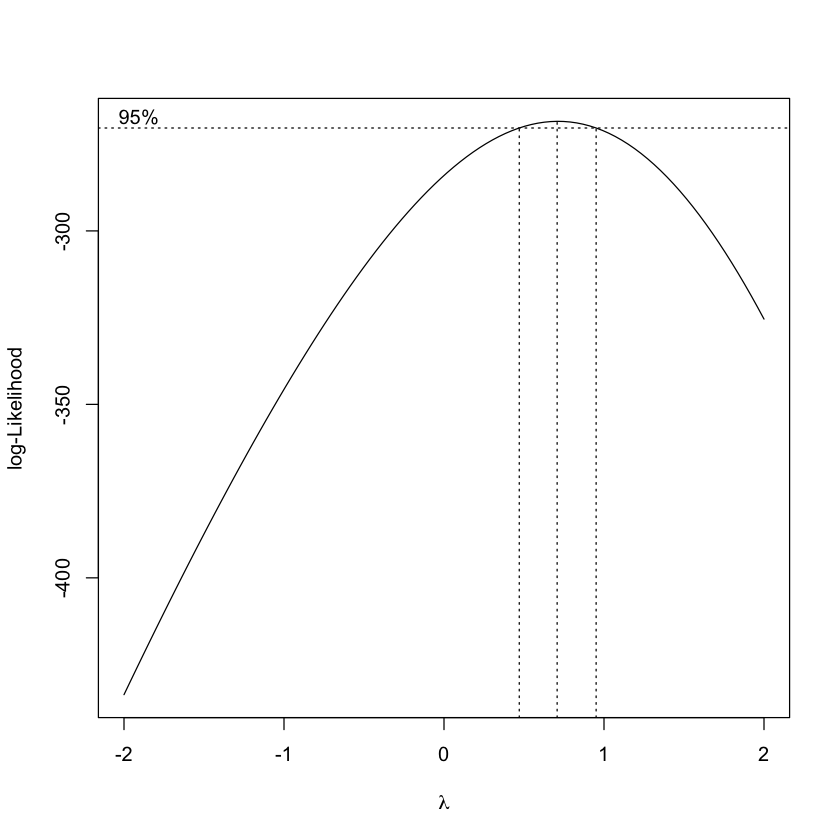

In [77]:
MASS::boxcox(lp100km~horsepower+weight+year,data=mpg)
MASS::boxcox(horsepower~lp100km+weight+year,data=mpg)
MASS::boxcox(weight~horsepower+lp100km+year,data=mpg)

lm.fit2=lm(lp100km^1/2~log(horsepower)+weight+year,data=mpg)
summary(lm.fit2)

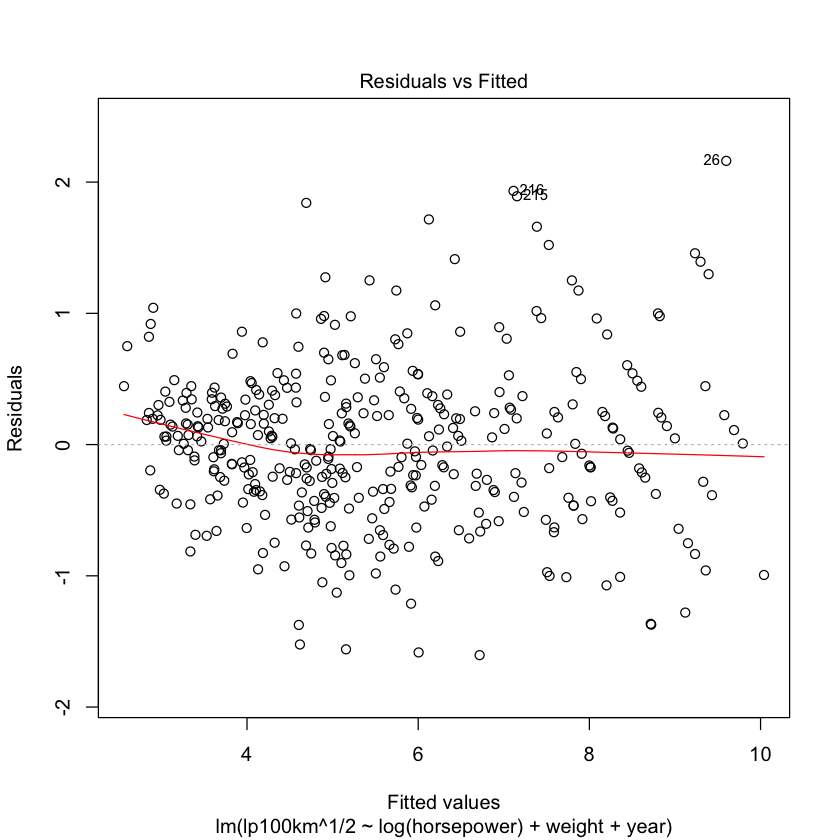

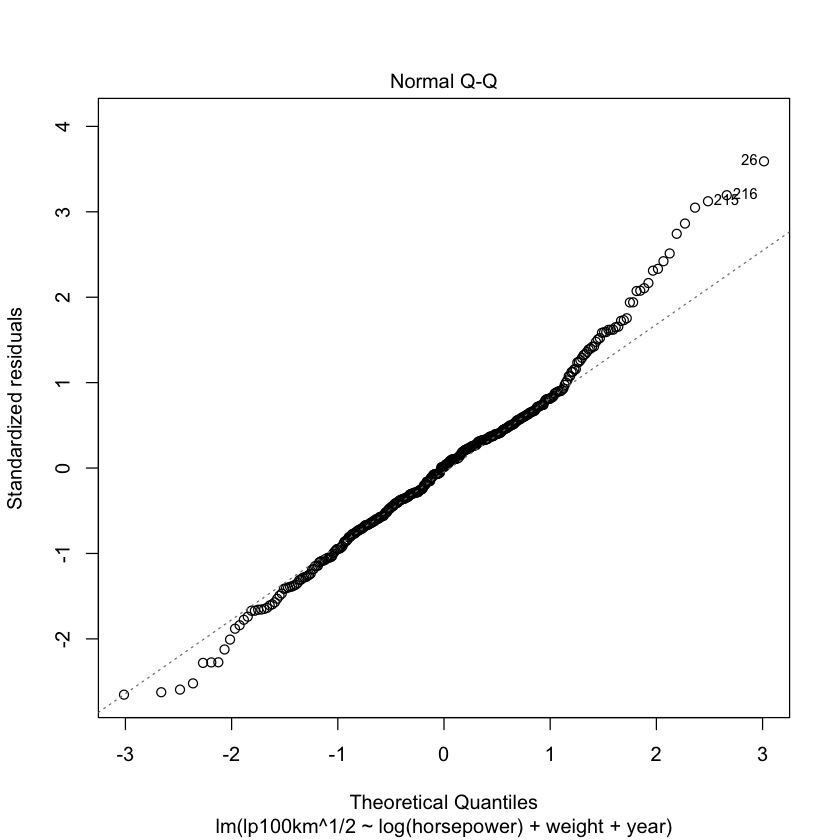

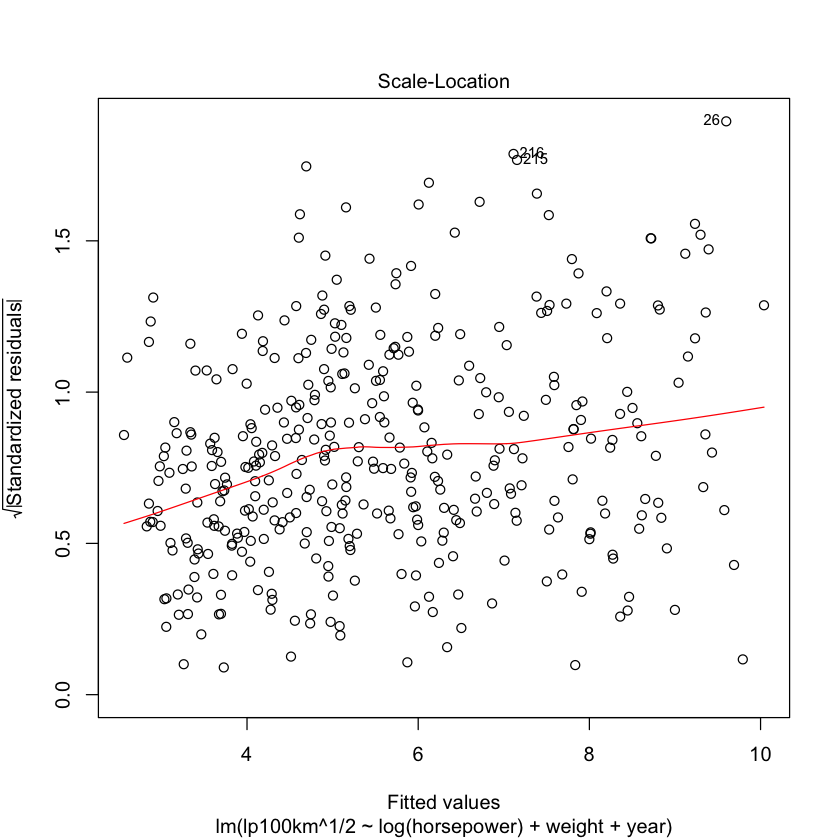

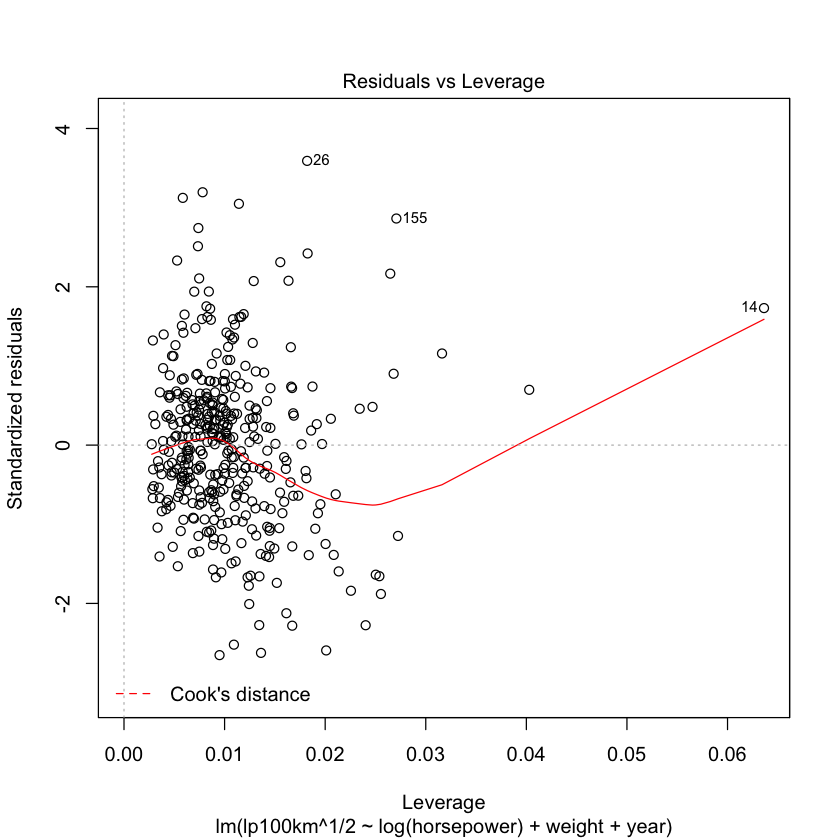

In [78]:
plot(lm.fit2)

In [83]:
MSE_full=mean(lm.full$residuals^2)
MSE_chosen=mean(lm.chosen$residual^2)
MSE_fit1=mean(lm.fit1$residual^2)
MSE_fit2=mean(lm.fit2$residual^2)
display=matrix(c("MSE_full"=MSE_full,"MSE_chosen"=MSE_chosen,"MSE_fit1"=MSE_fit1,"MSE_fit2"=MSE_fit2),nrow=1)
colnames(display)=c("MSE_full","MSE_chosen","MSE_fit1","MSE_fit2")
display

MSE_full,MSE_chosen,MSE_fit1,MSE_fit2
1.729365,1.8194,1.460819,0.3652874


In [ ]:
After the boxcox transformation, we reduce the mean square error significantly. But still, through the qq-plot, 
we can see that the residuals are still not normal and the variance of residual seems to be larger when index goes
up. It still need more powerful tools to deal with. 

# Analysis of Variance and Analysis of Covariance: Does `Origin` matter?

In [153]:
summary(lm.origin.anova<-lm(lp100km~origin,data=mpg))
anova(lm.origin.anova)


Call:
lm(formula = lp100km ~ origin, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7037 -1.9664 -0.3552  1.9660 10.7866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.7349     0.2022  62.973   <2e-16 ***
origin2      -3.7460     0.4304  -8.704   <2e-16 ***
origin3      -4.6717     0.4064 -11.496   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.133 on 384 degrees of freedom
Multiple R-squared:  0.3074,	Adjusted R-squared:  0.3038 
F-statistic: 85.22 on 2 and 384 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
origin,2,1672.900,836.449822,85.22172,2.349657e-31
Residuals,384,3768.954,9.814985,NA,NA


It seems that the means of the fuel consumption do differ from different origins. However, after we consider other predictors in the model, origin no longer matters in terms of prediction.

In [154]:
summary(lm.origin.ancova<-lm(lp100km~horsepower+year+weight+origin,data=mpg))
anova(lm.origin.ancova)


Call:
lm(formula = lp100km ~ horsepower + year + weight + origin, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1740 -0.7624 -0.0333  0.6305  4.0155 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 23.958278   1.518491  15.778  < 2e-16 ***
horsepower   0.015468   0.003448   4.485 9.64e-06 ***
year        -0.299701   0.018688 -16.037  < 2e-16 ***
weight       0.002861   0.000161  17.767  < 2e-16 ***
origin2     -0.496032   0.187808  -2.641   0.0086 ** 
origin3     -0.274057   0.189914  -1.443   0.1498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.207 on 381 degrees of freedom
Multiple R-squared:  0.898,	Adjusted R-squared:  0.8967 
F-statistic:   671 on 5 and 381 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
horsepower,1,3988.31780,3988.317798,2738.198220,4.901684e-176
year,1,275.28986,275.289863,189.001542,3.314861e-35
weight,1,612.90925,612.909246,420.795707,1.556812e-63
origin,2,10.39191,5.195956,3.567308,2.917864e-02
Residuals,381,554.94488,1.456548,NA,NA


# Principle Component Analysis

In [155]:
PCA<-princomp(mpg[,2:7],cor = TRUE)
summary(PCA)
PCA$loadings

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4      Comp.5
Standard deviation     2.0644097 0.9230264 0.8140545 0.35917526 0.244507684
Proportion of Variance 0.7102979 0.1419963 0.1104475 0.02150114 0.009964001
Cumulative Proportion  0.7102979 0.8522942 0.9627416 0.98424275 0.994206756
                            Comp.6
Standard deviation     0.186438899
Proportion of Variance 0.005793244
Cumulative Proportion  1.000000000


Loadings:
             Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
cylinders     0.454  0.189  0.175  0.683  0.220  0.462
displacement  0.469  0.160  0.139  0.157        -0.841
horsepower    0.464        -0.136 -0.594  0.619  0.174
weight        0.446  0.258  0.267 -0.365 -0.693  0.223
acceleration -0.329  0.232  0.857 -0.154  0.284       
year         -0.227  0.904 -0.356                     

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

In [156]:
PCA.z<-as.matrix(mpg[,2:7])%*%eigen(cor(mpg[,2:7]))$vectors

In [157]:
summary(lm(mpg$lp100km~1+PCA.z[,1]+PCA.z[,2]))


Call:
lm(formula = mpg$lp100km ~ 1 + PCA.z[, 1] + PCA.z[, 2])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7747 -0.8429 -0.0442  0.8745  4.7636 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.747803   0.874278   10.01   <2e-16 ***
PCA.z[, 1]  -0.050714   0.004140  -12.25   <2e-16 ***
PCA.z[, 2]  -0.081286   0.007816  -10.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.435 on 384 degrees of freedom
Multiple R-squared:  0.8548,	Adjusted R-squared:  0.854 
F-statistic:  1130 on 2 and 384 DF,  p-value: < 2.2e-16


In [158]:
summary(lm(mpg$lp100km~1+PCA.z[,1]+PCA.z[,2]+PCA.z[,3]))


Call:
lm(formula = mpg$lp100km ~ 1 + PCA.z[, 1] + PCA.z[, 2] + PCA.z[, 
    3])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2918 -0.7005 -0.0312  0.6361  4.6531 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.218707   1.416416   15.69   <2e-16 ***
PCA.z[, 1]  -0.060560   0.003698  -16.38   <2e-16 ***
PCA.z[, 2]  -0.238285   0.015502  -15.37   <2e-16 ***
PCA.z[, 3]  -0.137681   0.012224  -11.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.245 on 383 degrees of freedom
Multiple R-squared:  0.8909,	Adjusted R-squared:  0.8901 
F-statistic:  1043 on 3 and 383 DF,  p-value: < 2.2e-16
